# Spaceship Titanic - EDA

In [24]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

## 1. Data import

In [25]:
df = pd.read_csv('../datasets/train.csv', index_col='PassengerId')
target = 'Transported'
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2. Missing values analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [23]:
nb_rows = df.shape[0]
nb_data = df.shape[0] * df.shape[1]

def compute_prop(number, total):
    ###Compute the proportion of 'number' over 'total' and return a percentage###
    return (number / total) * 100

total_missings = 0

for column in df.columns:
    nb_missings = df[df[column].isna()].shape[0]
    total_missings += nb_missings
    print(f'{column}: {nb_missings} missing values ({compute_prop(nb_missings, nb_rows):.1f}%)')

print(f'Total: {total_missings} missing values ({compute_prop(total_missings, nb_data):.1f}%)')

HomePlanet: 201 missing values (2.3%)
CryoSleep: 217 missing values (2.5%)
Cabin: 199 missing values (2.3%)
Destination: 182 missing values (2.1%)
Age: 179 missing values (2.1%)
VIP: 203 missing values (2.3%)
RoomService: 181 missing values (2.1%)
FoodCourt: 183 missing values (2.1%)
ShoppingMall: 208 missing values (2.4%)
Spa: 183 missing values (2.1%)
VRDeck: 188 missing values (2.2%)
Name: 200 missing values (2.3%)
Transported: 0 missing values (0.0%)
Total: 2324 missing values (2.1%)


<AxesSubplot:ylabel='PassengerId'>

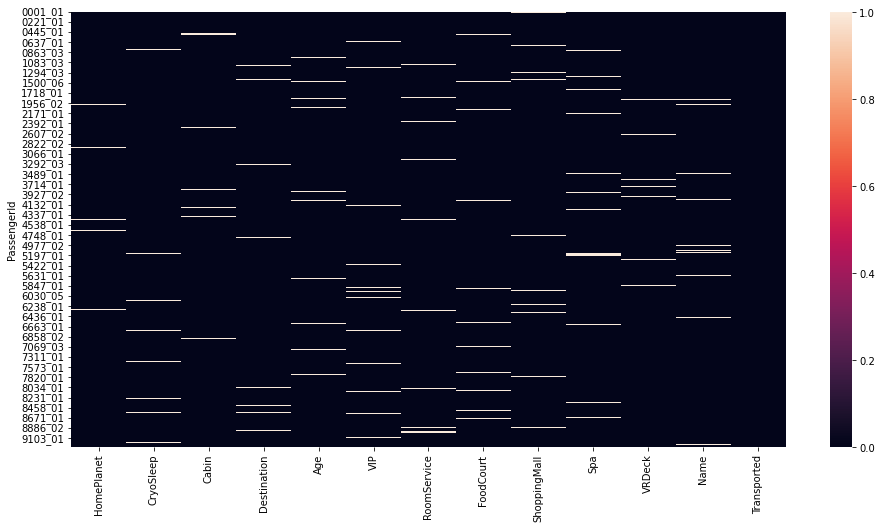

In [14]:
missings_df = df.isna()
plt.figure(figsize=(16, 8))
sns.heatmap(missings_df)

In [22]:
nb_multiple_missings = missings_df[missings_df.sum(axis=1) > 1].shape[0]
nb_single_missing = missings_df[missings_df.sum(axis=1) == 1].shape[0]
print(f'{nb_single_missing} ({compute_prop(nb_single_missing, nb_rows):.1f}%) rows with only 1 missing value.')
print(f'{nb_multiple_missings} ({compute_prop(nb_multiple_missings, nb_rows):.1f}%) rows with 2 or more missing values.')

1867 (21.5%) rows with only 1 missing value.
220 (2.5%) rows with 2 or more missing values.


## 3. Numerical features analysis

In [26]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

## 4. Categorical features analysis

In [27]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']